# Problem Definition

## Problem Statement

The huge amount of applications for Credit at Home Credit Indonesia (HCI) has made the evaluation on the applications very difficult. Even sometimes the decision that has been made is incorrect which made Home Credit Indonesia suffer losses because of the customers defaulted.

From the data Home Credit Indonesia has suffer Rp. ... losses from the customer that failed to pay their bill. The reason for this is the wrong decision when reviewing the credit applications.

## Role

As a Data Scientist Intern at Home Credit Indonesia, I will analyse the data and make machine learning model which can predict credit application correctly and give insight to prevent losses and increase the profit of Home Credit Indonesia.

## Goal

My Goal is to make a model and give insight for the Home Credit Indonesia in prospering their credit business.

## Objective

Make a machine learning model which can predict whether credit applications should be accepted or not so that it can be a guide when evaluating the applications.

## Business Metrics

# Import

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [2]:
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\VIX\Final Project

28/08/2022  02:45    <DIR>          .
28/08/2022  02:45    <DIR>          ..
27/08/2022  14:38    <DIR>          .ipynb_checkpoints
27/08/2022  14:02    <DIR>          Dataset
27/08/2022  14:00            95.786 Dataset_Description.pdf
28/08/2022  02:45           607.699 Final Project HCI.ipynb
27/08/2022  14:00           713.984 Pedoman_Pembuatan.pdf
               3 File(s)      1.417.469 bytes
               4 Dir(s)  221.505.085.440 bytes free


In [5]:
cd Dataset

C:\Users\DELL\Documents\Bryan\VIX\Final Project\Dataset


In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\VIX\Final Project\Dataset

27/08/2022  14:02    <DIR>          .
27/08/2022  14:02    <DIR>          ..
11/12/2019  02:58        26.567.651 application_test.csv
11/12/2019  02:59       166.133.370 application_train.csv
11/12/2019  02:59       170.016.717 bureau.csv
11/12/2019  02:59       375.592.889 bureau_balance.csv
11/12/2019  03:00       424.582.605 credit_card_balance.csv
11/12/2019  02:58            37.383 HomeCredit_columns_description.csv
27/08/2022  14:01       721.616.255 home-credit-default-risk.zip
11/12/2019  03:00       723.118.349 installments_payments.csv
11/12/2019  02:58       392.703.158 POS_CASH_balance.csv
11/12/2019  03:02       404.973.293 previous_application.csv
11/12/2019  03:02           536.202 sample_submission.csv
              11 File(s)  3.405.877.872 bytes
               2 Dir(s)  221.505.052.672 bytes free


## Dataset

In [7]:
application_test = pd.read_csv("application_test.csv")
application_train = pd.read_csv("application_train.csv")

bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")

previous_application = pd.read_csv("previous_application.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")

sample_submission = pd.read_csv("sample_submission.csv")

# EDA

## Application_train

In [8]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
application_train.loc[:, application_train.isna().any()]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,NaN,Sales staff,1.0,0.145570,0.681632,NaN,0.2021,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,NaN,1.0,NaN,0.115992,NaN,0.0247,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,NaN,Managers,1.0,0.744026,0.535722,0.218859,0.1031,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.514163,0.661024,0.0124,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application_train.shape

(307511, 122)

## Total Losses

In [259]:
application_train[application_train['TARGET'] == 1]['AMT_CREDIT'].sum()

13846851949.5

More than half of the columns in application_train have NaN values. Therefore, the data will be row-dropped if it has a NaN value in the column with a little (below 1% of the total row) NaN value. While the column that has many NaN values will be filled with 0 or dropped in the next process.

In [11]:
null_cols_appliaction_train = application_train.loc[:, application_train.isna().any()].isna().sum().sort_values()

In [12]:
null_cols_appliaction_train

DAYS_LAST_PHONE_CHANGE           1
CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
EXT_SOURCE_2                   660
                             ...  
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
Length: 67, dtype: int64

In [13]:
cols_drop_row = null_cols_appliaction_train[null_cols_appliaction_train < 3000].index.to_list()

In [14]:
null_cols_appliaction_train[null_cols_appliaction_train > 3000]

AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
EXT_SOURCE_3                     60965
OCCUPATION_TYPE                  96391
EMERGENCYSTATE_MODE             145755
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
HOUSETYPE_MODE                  154297
LIVINGAREA_AVG                  154350
LIVINGAREA_MODE                 154350
LIVINGAREA_MEDI                 154350
ENTRANCES_MEDI                  154828
ENTRANCES_AVG                   154828
ENTRANCES_MODE                  154828
APARTMENTS_AVG                  156061
APARTMENTS_MODE                 156061
APARTMENTS_MEDI          

In [15]:
application_train_dropped = application_train.dropna(subset = cols_drop_row)

In [16]:
application_train_dropped.shape[0]
application_train.shape[0]

307511

In [17]:
total_dropped_rows = application_train.shape[0] - application_train_dropped.shape[0]
persentase_dropped = (total_dropped_rows / application_train.shape[0]) * 100
print(f'Total row yang di drop adalah: {total_dropped_rows}')
print(f'Sebesar {persentase_dropped:.2f}% dari data yang ada')

Total row yang di drop adalah: 2980
Sebesar 0.97% dari data yang ada


Based on the column description, there are several columns that have a NaN value, which means that the value is empty or can be represented by the number 0. Therefore, the columns will be filled with the number 0.

In [18]:
application_train_filledNA = application_train_dropped.fillna(0)

## Bureau

On Bureau table the focused is on the active credit

In [19]:
bureau_active = bureau[bureau['CREDIT_ACTIVE'] == 'Active']

In [20]:
bureau_active['CREDIT_CURRENCY'].value_counts()

currency 1    630426
currency 2       145
currency 3        35
currency 4         1
Name: CREDIT_CURRENCY, dtype: int64

Because Other currencies only have few values, the data that will be used is only data that has currency 1 so that calculations can be carried out correctly

In [21]:
dropped_sk_id = bureau_active[bureau_active['CREDIT_CURRENCY'] != 'currency 1']['SK_ID_CURR'].to_list()

In [22]:
bureau_cur1 = bureau_active[~bureau_active['SK_ID_CURR'].isin(dropped_sk_id)].copy()

In [23]:
bureau_cur1

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716404,166279,5057599,Active,currency 1,-99,0,997.0,NaN,0.0,0,450000.0,432787.50,0.00,0.0,Consumer credit,-7,NaN
1716410,280228,5057642,Active,currency 1,-575,0,813.0,NaN,NaN,0,67500.0,0.00,0.00,0.0,Credit card,-46,NaN
1716412,288038,5057657,Active,currency 1,-541,0,7.0,NaN,NaN,0,225000.0,10971.00,0.00,0.0,Consumer credit,-11,NaN
1716417,433007,5057703,Active,currency 1,-740,0,31128.0,NaN,NaN,0,67500.0,2466.00,NaN,0.0,Credit card,-433,NaN


In [24]:
bureau_cur1.isna().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE        72353
DAYS_ENDDATE_FACT         627987
AMT_CREDIT_MAX_OVERDUE    411784
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 8
AMT_CREDIT_SUM_DEBT        73458
AMT_CREDIT_SUM_LIMIT      173072
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               431072
dtype: int64

DAYS_ENDDATE_FACT has many NaN column because it is only for Closed credit. Therefore, we have to drop it.

In [25]:
bureau_cur1.drop('DAYS_ENDDATE_FACT', axis = 1, inplace = True)

The column that we will focus on is AMT_CREDIT_SUM therefore we will drop the row that has NaN value on this column

In [26]:
cleaned_bureau_cur1 = bureau_cur1.dropna(subset = ["AMT_CREDIT_SUM"])

In [27]:
credit_from_bureau = cleaned_bureau_cur1.groupby("SK_ID_CURR").agg({"AMT_CREDIT_SUM":"sum"}).reset_index()

Above is the total active credit each customer has in the Credit Bureau.

## Previous_application

In [28]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [29]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [30]:
previous_application['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

The thing we have to focus on is the approved application 

In [31]:
approved_previous_application = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved']

In [32]:
approved_previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [33]:
credit_from_previous_application = approved_previous_application.groupby('SK_ID_CURR').agg({'AMT_CREDIT':'sum'}).reset_index()

In [34]:
credit_from_previous_application

,SK_ID_CURR,AMT_CREDIT
0,100001,23787.0
1,100002,179055.0
2,100003,1452573.0
3,100004,20106.0
4,100005,40153.5
...,...,...
337693,456251,40455.0
337694,456252,56821.5
337695,456253,41251.5
337696,456254,268879.5


## df

In [35]:
application_train_merged_bureau = application_train_filledNA.merge(credit_from_bureau, how = 'left', on = 'SK_ID_CURR')

In [36]:
df = application_train_merged_bureau.merge(credit_from_previous_application, how = 'left', on = 'SK_ID_CURR')

In [37]:
df.rename(columns = {'AMT_CREDIT_SUM':'AMT_CREDIT_BUREAU', 'AMT_CREDIT_y':'AMT_CREDIT_PREVIOUS'}, inplace = True)

For the column who have NaN, it means the customer does not have history for credit application either in bureau or HCI. Therefore, we will replace it with 0

In [38]:
df.fillna(0, inplace = True)

In [39]:
df.duplicated().any()

False

In [40]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [41]:
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

## Feature Selection

### Feature Importance

In [172]:
X = df[num].drop('TARGET', axis = 1)
y = df['TARGET']

In [173]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

RandomForestClassifier(random_state=0)

In [176]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

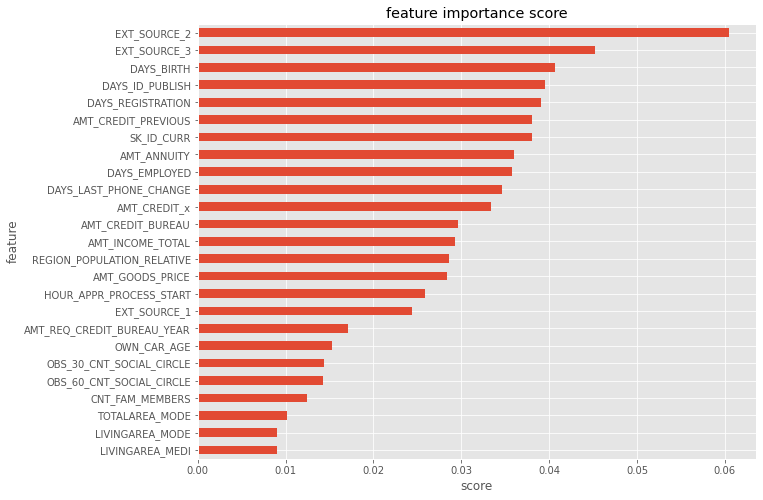

In [177]:
show_feature_importance(forest)

### Person Correlation

In [179]:
correlation = df.corr()

In [192]:
correlation['TARGET'].sort_values().tail(10)

REG_CITY_NOT_LIVE_CITY         0.044723
FLAG_EMP_PHONE                 0.046223
REG_CITY_NOT_WORK_CITY         0.051146
DAYS_ID_PUBLISH                0.051397
DAYS_LAST_PHONE_CHANGE         0.055887
REGION_RATING_CLIENT           0.058904
REGION_RATING_CLIENT_W_CITY    0.060900
DAYS_BIRTH                     0.078636
TARGET                         1.000000
FLAG_MOBIL                          NaN
Name: TARGET, dtype: float64

In [191]:
correlation['TARGET'].sort_values().head(10)

EXT_SOURCE_2                   -0.160819
EXT_SOURCE_3                   -0.120032
EXT_SOURCE_1                   -0.064831
FLOORSMAX_AVG                  -0.049687
FLOORSMAX_MEDI                 -0.049574
FLOORSMAX_MODE                 -0.049319
DAYS_EMPLOYED                  -0.045168
TOTALAREA_MODE                 -0.041134
YEARS_BEGINEXPLUATATION_MEDI   -0.040783
YEARS_BEGINEXPLUATATION_AVG    -0.040764
Name: TARGET, dtype: float64

### Phik Correlation

Because we are going to compare the relationship between categorical and continuous variable we should use Phik correlation. Not only it can depicts the relationship between categorical and continuos variable, it can also cath a non-linear relationship between variables.

In [185]:
phik_corr = df.phik_matrix()

interval columns not set, guessing: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable FLAG_MOBIL for analysis 1. Dropping this column
  warnings.warn(


In [189]:
phik_corr['TARGET'].sort_values().tail(25)

DAYS_REGISTRATION               0.055026
YEARS_BEGINEXPLUATATION_MEDI    0.056147
YEARS_BEGINEXPLUATATION_MODE    0.056279
AMT_CREDIT_x                    0.056858
WALLSMATERIAL_MODE              0.058341
AMT_GOODS_PRICE                 0.059076
HOUSETYPE_MODE                  0.061075
FLOORSMAX_MODE                  0.065258
FLOORSMAX_MEDI                  0.065638
FLOORSMAX_AVG                   0.065740
DAYS_ID_PUBLISH                 0.067724
FLAG_DOCUMENT_3                 0.068893
REG_CITY_NOT_LIVE_CITY          0.070101
FLAG_EMP_PHONE                  0.072463
DAYS_EMPLOYED                   0.072472
DAYS_LAST_PHONE_CHANGE          0.074032
REG_CITY_NOT_WORK_CITY          0.080182
NAME_INCOME_TYPE                0.085346
ORGANIZATION_TYPE               0.089352
OCCUPATION_TYPE                 0.090158
DAYS_BIRTH                      0.102957
EXT_SOURCE_1                    0.125463
EXT_SOURCE_3                    0.197562
EXT_SOURCE_2                    0.214521
TARGET          

From the feature importance and correlation we can see that EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 are important features. Following those, several features are also considered quite important. Those features are:
- DAYS_BIRTH
- OCCUPATION_TYPE
- ORGANIZATION_TYPE
- NAME_INCOME_TYPE
- REG_CITY_NOT_WORK_CITY
- REGION_RATING_CLIENT_W_CITY
- AMT_CREDIT_PREVIOUS
- AMT_CREDIT_x
- AMT_CREDIT_BUREAU
- AMT_INCOME_TOTAL
- DAYS_ID_PUBLISH
- AMT_ANNUITY
- DAYS_EMPLOYED

In [42]:
cols = ['EXT_SOURCE_1', 
        'EXT_SOURCE_2', 
        'EXT_SOURCE_3', 
        'DAYS_BIRTH', 
        'OCCUPATION_TYPE', 
        'ORGANIZATION_TYPE', 
        'NAME_INCOME_TYPE', 
        'REG_CITY_NOT_WORK_CITY', 
        'REGION_RATING_CLIENT_W_CITY', 
        'AMT_CREDIT_PREVIOUS', 
        'AMT_CREDIT_x', 
        'AMT_CREDIT_BUREAU',
        'AMT_INCOME_TOTAL',
        'DAYS_ID_PUBLISH',
        'AMT_ANNUITY',
        'DAYS_EMPLOYED',
        'TARGET'
       ]

In [43]:
df_selection = df[cols].copy()

In [44]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 304530
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EXT_SOURCE_1                 304531 non-null  float64
 1   EXT_SOURCE_2                 304531 non-null  float64
 2   EXT_SOURCE_3                 304531 non-null  float64
 3   DAYS_BIRTH                   304531 non-null  int64  
 4   OCCUPATION_TYPE              304531 non-null  object 
 5   ORGANIZATION_TYPE            304531 non-null  object 
 6   NAME_INCOME_TYPE             304531 non-null  object 
 7   REG_CITY_NOT_WORK_CITY       304531 non-null  int64  
 8   REGION_RATING_CLIENT_W_CITY  304531 non-null  int64  
 9   AMT_CREDIT_PREVIOUS          304531 non-null  float64
 10  AMT_CREDIT_x                 304531 non-null  float64
 11  AMT_CREDIT_BUREAU            304531 non-null  float64
 12  AMT_INCOME_TOTAL             304531 non-null  float64
 13 

## Univariate Analysis

In [90]:
cat = []
num = []

for col in df_selection.columns:
    if df_selection[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [206]:
df[cat].describe()

,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE
count,304531,304531,304531
unique,19,58,8
top,0,Business Entity Type 3,Working
freq,95435,67270,157341


OCCUPATION_TYPE and ORGANIZATION have too omany unique values. Hence, we should shrink down the value so there won't be a dimensionality curse.

In [242]:
df_selection['OCCUPATION_TYPE'].value_counts()

0                        95435
Laborers                 54730
Sales staff              31790
Core staff               27263
Managers                 21114
Drivers                  18456
High skill tech staff    11261
Accountants               9698
Medicine staff            8459
Security staff            6667
Cooking staff             5898
Cleaning staff            4615
Private service staff     2629
Low-skill Laborers        2077
Waiters/barmen staff      1335
Secretaries               1293
Realty agents              742
HR staff                   558
IT staff                   511
Name: OCCUPATION_TYPE, dtype: int64

In [86]:
rename_val_occupation = {
    0 : 'Unknown',
    'Sales staff':'Staff', 'Core staff':'Staff', 'High skill tech staff':'Staff', 'Medicine staff':'Staff','Security staff':'Staff',
    'Cooking staff':'Staff', 'Cleaning staff':'Staff', 'Private service staff':'Staff', 'Waiters/barmen staff':'Staff',
    'HR staff':'Staff', 'IT staff':'Staff'
}

In [87]:
df_selection['OCCUPATION_TYPE'].replace(rename_val_occupation, inplace = True)

In [245]:
df_selection['OCCUPATION_TYPE'].value_counts()

Staff                 100986
Unknown                95435
Laborers               54730
Managers               21114
Drivers                18456
Accountants             9698
Low-skill Laborers      2077
Secretaries             1293
Realty agents            742
Name: OCCUPATION_TYPE, dtype: int64

In [221]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67270
XNA                       54852
Self-employed             38048
Other                     16546
Medicine                  11078
Business Entity Type 2    10458
Government                10308
School                     8823
Trade: type 7              7769
Kindergarten               6823
Construction               6659
Business Entity Type 1     5919
Transport: type 4          5353
Trade: type 3              3443
Industry: type 9           3328
Industry: type 3           3254
Security                   3215
Housing                    2935
Industry: type 11          2685
Military                   2610
Bank                       2455
Agriculture                2436
Police                     2319
Transport: type 2          2184
Postal                     2137
Security Ministries        1953
Trade: type 2              1871
Restaurant                 1794
Services                   1561
University                 1311
Industry: type 7           1295
Transpor

In [51]:
rename_val_organization = {
    'Trade: type 1':'Trade', 'Trade: type 2':'Trade', 'Trade: type 3':'Trade', 'Trade: type 4':'Trade', 'Trade: type 5':'Trade',
    'Trade: type 6':'Trade', 'Trade: type 7':'Trade',
    
    'Industry: type 1':'Industry', 'Industry: type 2':'Industry', 'Industry: type 3':'Industry', 'Industry: type 4':'Industry', 'Industry: type 5':'Industry',
    'Industry: type 6':'Industry', 'Industry: type 7':'Industry', 'Industry: type 8':'Industry', 'Industry: type 9':'Industry', 'Industry: type 10':'Industry',
    'Industry: type 11':'Industry', 'Industry: type 12':'Industry', 'Industry: type 13':'Industry', 
    
    'Transport: type 1':'Transport', 'Transport: type 2':'Transport', 'Transport: type 3':'Transport', 'Transport: type 4':'Transport',
    
    'Business Entity Type 1':'Business Entity', 'Business Entity Type 2':'Business Entity', 'Business Entity Type 3':'Business Entity'
    
}

In [57]:
df_selection['ORGANIZATION_TYPE'].replace(rename_val_organization, inplace = True)

In [94]:
df_selection['NAME_INCOME_TYPE'].value_counts()

Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Because there are several types which only have very few samples it will impact the model on learning from these classes with few data. Therefore, we will change it into the most similar type. For example, Student into Pensioner because student probably get money from their parents, businessman to working, and maternity leave for pensioner because when someone take maternity leave they will still get some of their salary. Moreover, unemployed can also be pensioner because it means they get money from someone to keep their lives go on.

In [95]:
rename_val_income = {
    'Student':'Pensioner',
    'Businessman':'Working',
    'Maternity leave':'Pensioner',
    'Unemployed':'Pensioner'
}

In [97]:
df_selection['NAME_INCOME_TYPE'].replace(rename_val_income, inplace = True)

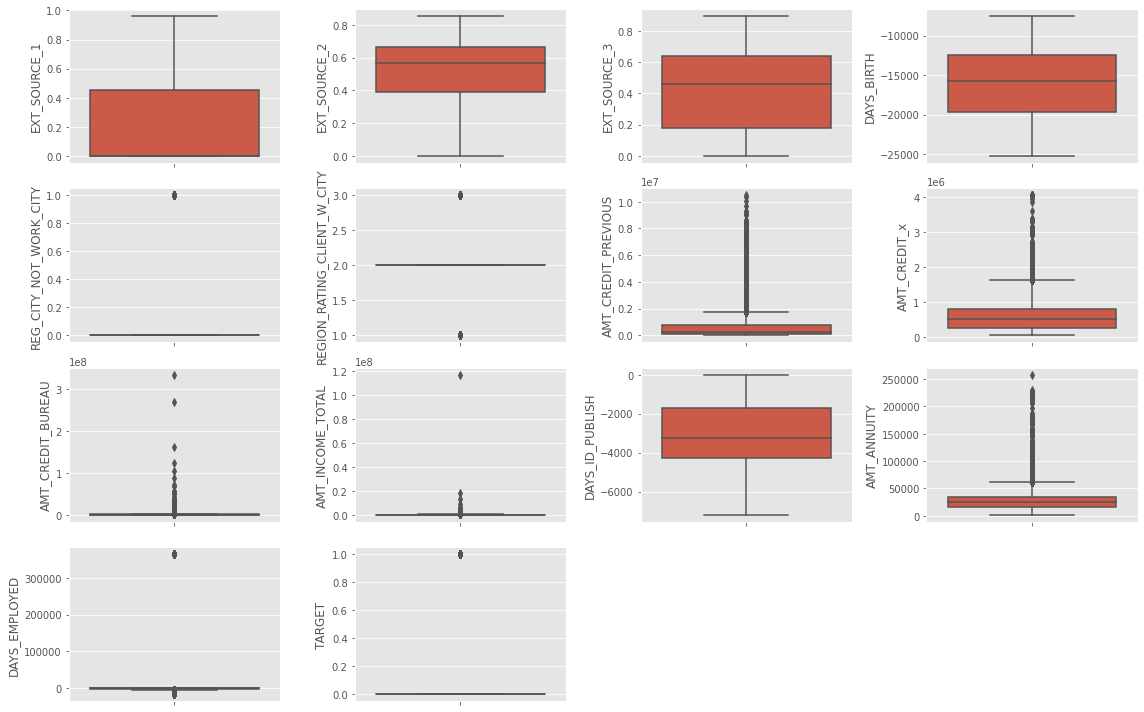

In [211]:
plt.figure(figsize = (16,10))
for i in range(len(num)):
    plt.subplot(4, round(len(num)/4), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

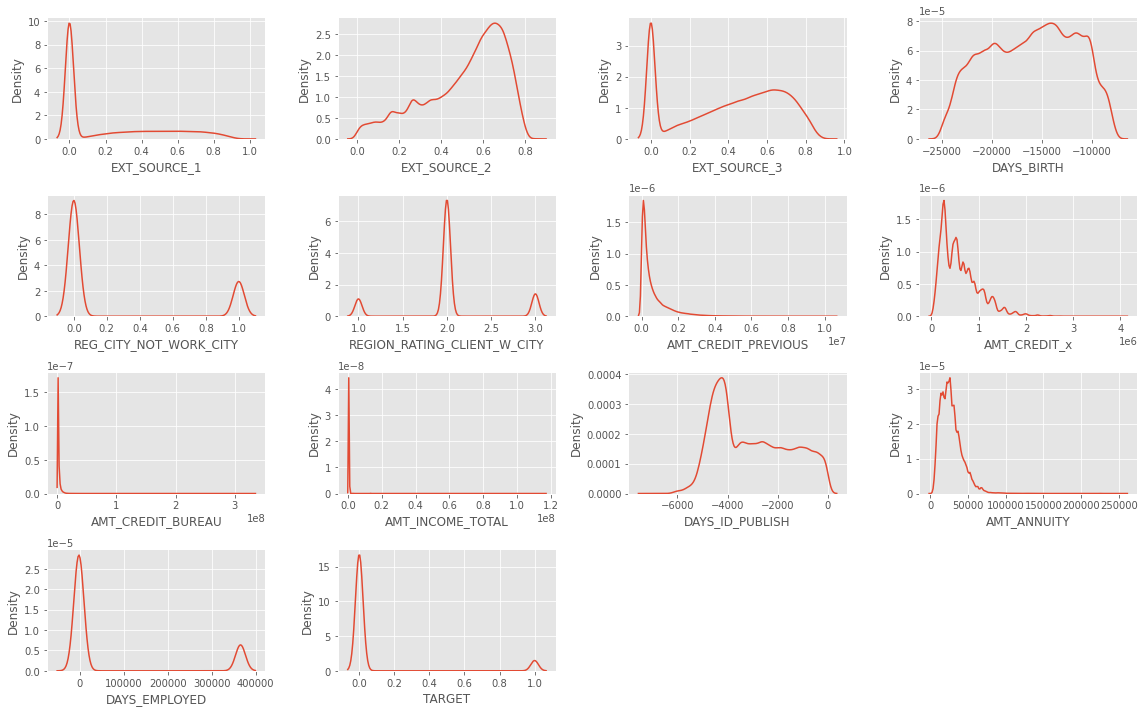

In [212]:
plt.figure(figsize = (16,10))
for i in range(len(num)):
    plt.subplot(4, round(len(num)/4), i+1)
    sns.kdeplot(x = df[num[i]])
    plt.tight_layout()

In [116]:
df_selection.columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_CREDIT_PREVIOUS', 'AMT_CREDIT_x',
       'AMT_CREDIT_BUREAU', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'TARGET'],
      dtype='object')

From the boxplot and kdeplot above we can see that some columns has many outliers and most of the columns are right-skewed. Therefore we will do Outlier handling and transformatioin to fix these issues.

In [58]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [72]:
def group_df_uni(col):
    ndf = df_selection.groupby(col).size().reset_index().rename(columns = {0:'count'})
    ndf['percentage'] = (ndf['count']/df.shape[0]) * 100
    return ndf

In [102]:
def plot_bar_uni(col, rotation):
    df1 = group_df_uni(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,10))
    sns.barplot(x = col, y= 'percentage', data = df1, ci = None)
    plt.xticks(rotation = rotation)
    show_val_percent(ax)

In [88]:
df_selection['OCCUPATION_TYPE'].value_counts()

Staff                 100986
Unknown                95435
Laborers               54730
Managers               21114
Drivers                18456
Accountants             9698
Low-skill Laborers      2077
Secretaries             1293
Realty agents            742
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df_selection['ORGANIZATION_TYPE'].value_counts()

In [93]:
df_selection['NAME_INCOME_TYPE'].value_counts()

Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [91]:
cat

['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE']

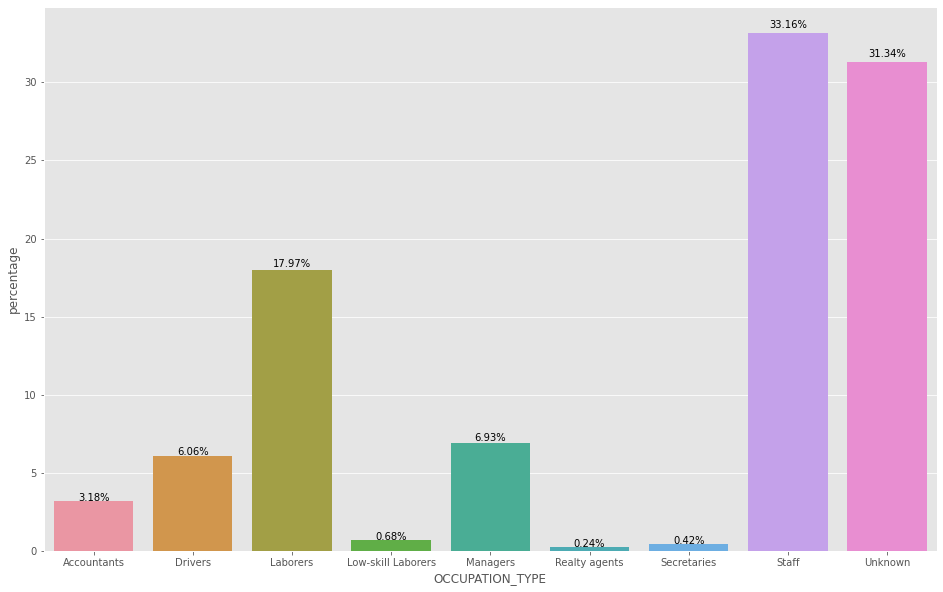

In [104]:
plot_bar_uni('OCCUPATION_TYPE',0)

We can see that most of the credit applicants comes from staff and laborers while most of them are unknown

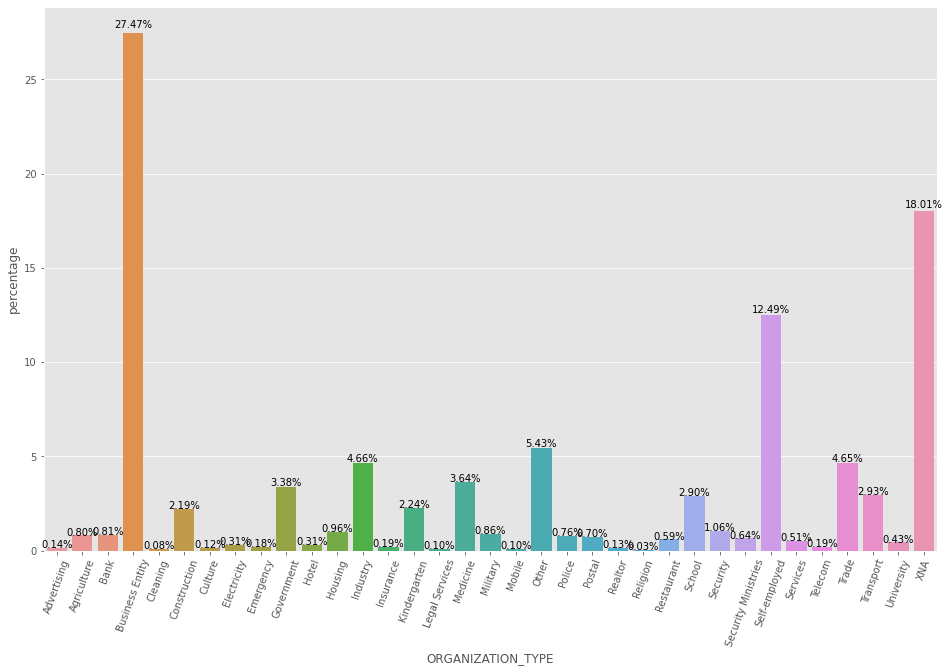

In [103]:
plot_bar_uni('ORGANIZATION_TYPE',70)

From here it can be said that Business entity, self-employed and XNA are the organization_type with the most credit applicants

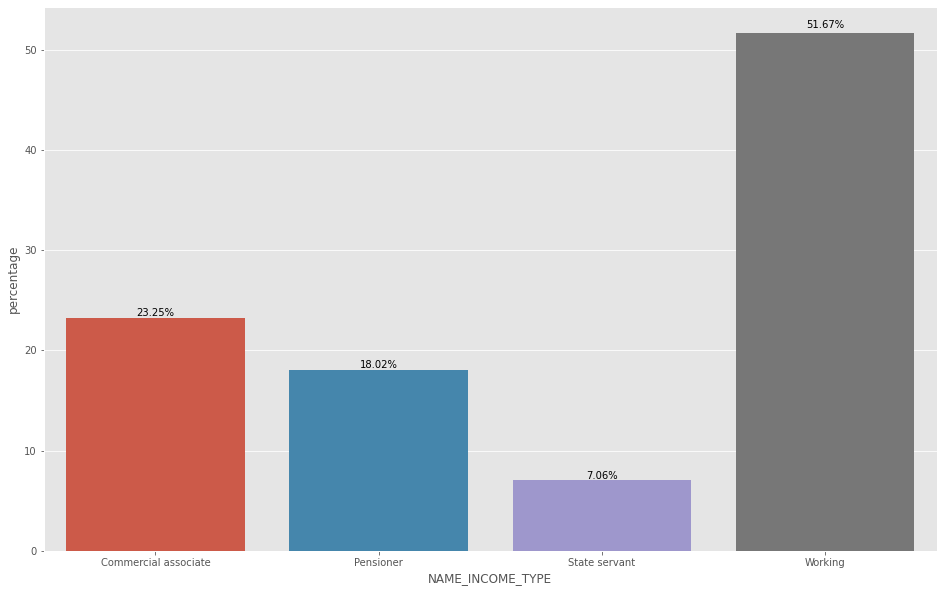

In [105]:
plot_bar_uni('NAME_INCOME_TYPE', 0)

From the barchart above we can conclude that half of the credit applicants' income comes from working

## Multivariate Analysis

In [106]:
phik_metrics_selection = df_selection.phik_matrix()

interval columns not set, guessing: ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT_W_CITY', 'AMT_CREDIT_PREVIOUS', 'AMT_CREDIT_x', 'AMT_CREDIT_BUREAU', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'TARGET']


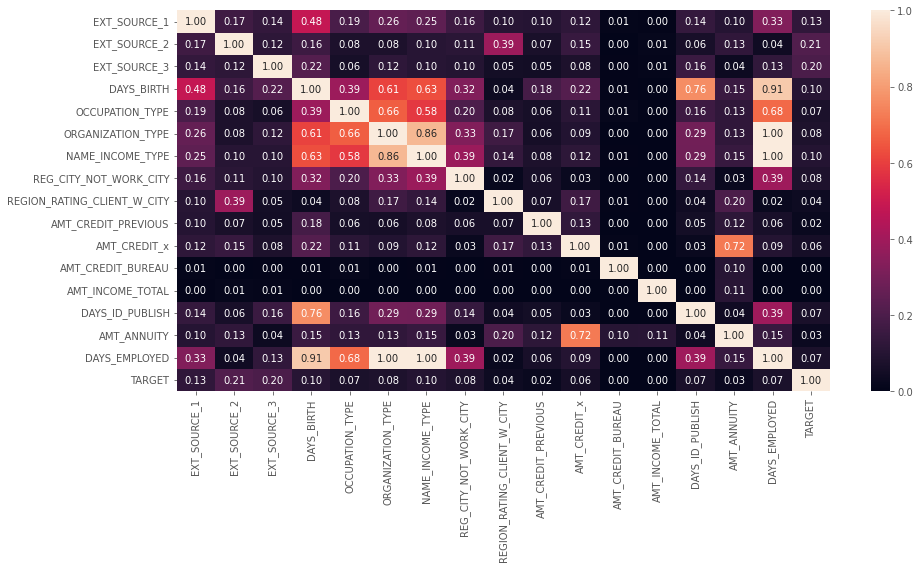

In [107]:
plt.figure(figsize = (14,8))
sns.heatmap(phik_metrics_selection, annot = True, fmt = '.2f')
plt.tight_layout()

From the heatmap above we can see that some of the features are highly correlated to each other, hence this will create a multicorrelation problem. Therefore, we will drop these features. The features that we will drop are:
- ORGANIZATION_TYPE

The others such as DAYS_EMPLOYED and NAME_INCOME_TYPE will be considered to be dropped in the following process.

In [108]:
df_selection.drop('ORGANIZATION_TYPE', axis = 1, inplace = True)

# Preprocessing

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

From the EDA above the preprocess that we have to do on our data are:
- Outlier handling
- feature encoding
- Train test split
- boxcox transformation to handle the right-skewed distribution of our data
- MinMaxScaler to make the scale of all columns the same

In [111]:
df_selection.isna().any().any()

False

## Outlier Handling

In [186]:
cat = []
num = []

for col in df_selection.columns:
    if df_selection[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [188]:
num.remove('TARGET')

In [189]:
outlier = num.copy()

In [190]:
print(f'rows count before the outlier filtered: {len(df_selection)}')

filtered_entries = np.array([True] * len(df_selection))

for col in outlier:
    zscore = abs(stats.zscore(df_selection[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keep the data that have z-score less than 3
    
df_filtered = df_selection[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

rows count before the outlier filtered: 304531
Jumlah baris setelah memfilter outlier: 287967


## Feature Encoding

In [193]:
df_encoded = pd.get_dummies(df_filtered)

## Train Test Split

In [194]:
X = df_encoded.drop('TARGET', axis = 1)
y = df_encoded['TARGET']

In [195]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Boxcox Transformation

In [196]:
log_col = ['EXT_SOURCE_1', 'EXT_SOURCE_3',
       'AMT_CREDIT_PREVIOUS', 'AMT_CREDIT_x',
       'AMT_CREDIT_BUREAU', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH',
       'AMT_ANNUITY']

In [197]:
X_train_transform = X_train.copy()
X_val_transform = X_val.copy()

In [198]:
for col in log_col:
    X_train_transform.loc[X_train_transform[col] == 0, col] =  X_train_transform.loc[X_train_transform[col] != 0][col].min()/2
    
for col in log_col:
    X_val_transform.loc[X_val_transform[col] == 0, col] =  X_val_transform.loc[X_val_transform[col] != 0][col].min()/2

In [199]:
X_train_transform['DAYS_ID_PUBLISH'] = abs(X_train_transform['DAYS_ID_PUBLISH'])
X_val_transform['DAYS_ID_PUBLISH'] = abs(X_val_transform['DAYS_ID_PUBLISH'])

In [200]:
X_train_transform[log_col].describe()

,EXT_SOURCE_1,EXT_SOURCE_3,AMT_CREDIT_PREVIOUS,AMT_CREDIT_x,AMT_CREDIT_BUREAU,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,AMT_ANNUITY
count,230373.000000,230373.000000,2.303730e+05,2.303730e+05,2.303730e+05,230373.000000,230373.000000,230373.000000
mean,0.218974,0.408018,5.105467e+05,5.737212e+05,7.358832e+05,160563.504208,2987.403407,26083.697308
std,0.279534,0.268796,5.820710e+05,3.659809e+05,1.121501e+06,79979.742699,1510.182494,12633.560756
min,0.007284,0.000264,3.438000e+03,4.500000e+04,2.250000e+00,26100.000000,1.000000,1980.000000
25%,0.007284,0.173527,1.066500e+05,2.700000e+05,2.250000e+00,112500.000000,1709.000000,16366.500000
50%,0.007284,0.457900,2.750625e+05,5.002110e+05,2.700000e+05,135000.000000,3242.000000,24511.500000
75%,0.446508,0.634706,7.057395e+05,7.875000e+05,9.765000e+05,202500.000000,4295.000000,33394.500000
max,0.962693,0.896010,2.855228e+06,1.805985e+06,6.966000e+06,882000.000000,7197.000000,70582.500000


In [201]:
for col in log_col:
    X_train_transform[col] = stats.boxcox(X_train_transform[col])[0]
for col in log_col:
    X_val_transform[col] = stats.boxcox(X_val_transform[col])[0]

### Before Transformation

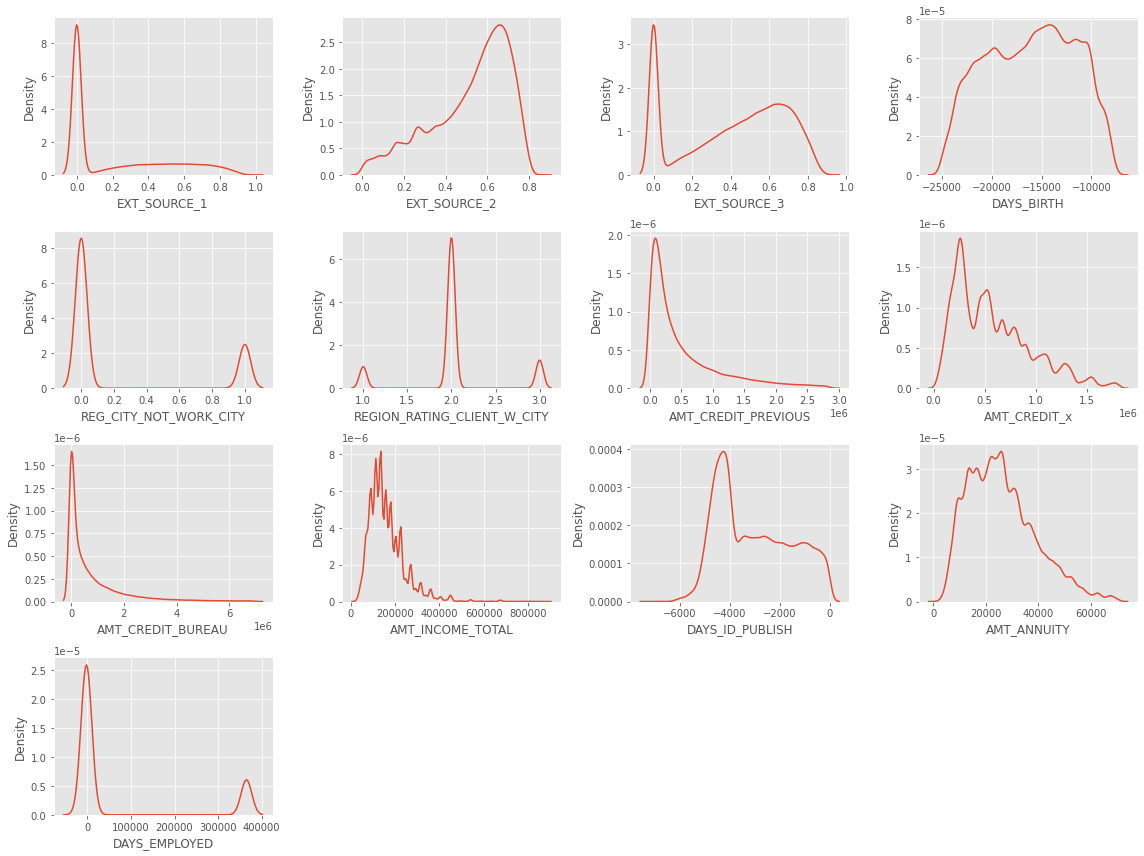

In [181]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(4, round(len(num)/3), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

### After Transformation

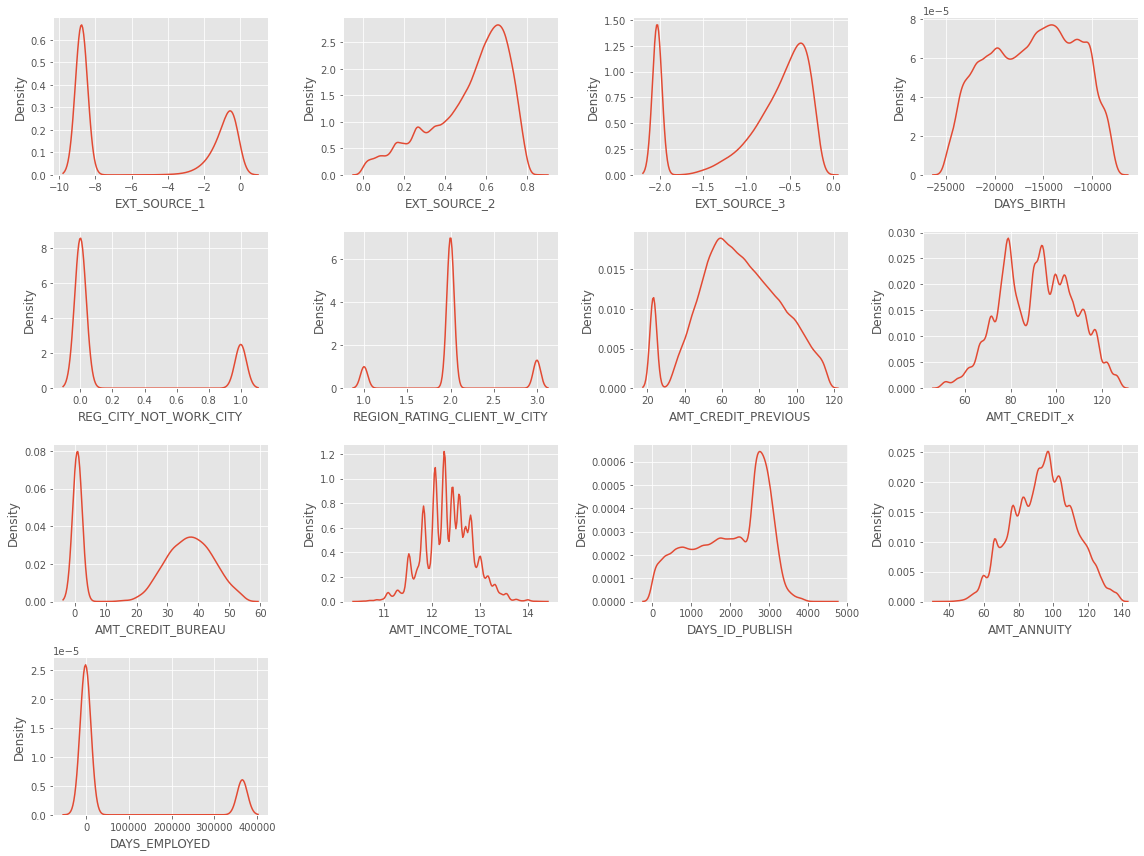

In [182]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(4, round(len(num)/3), i+1)
    sns.kdeplot(x = X_train_transform[num[i]])
    plt.tight_layout()

## Normalization (MinMaxScaler)

In [202]:
X_train_norm = X_train_transform.copy()
X_val_norm = X_val_transform.copy()

for i in X_train_transform.columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_val_norm[i] = scale.transform(X_val_norm[[i]])

# Modeling

In [213]:
X_train = X_train_norm.copy()
X_val = X_val_norm.copy()

In [204]:
import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings
warnings.filterwarnings('ignore')

## Evaluation Metrics

In [203]:
df_encoded['TARGET'].value_counts()

0    264225
1     23742
Name: TARGET, dtype: int64

We can see that there is a huge class imbalance about 11 : 1 (class 0: class 1). Therefore we cannot use metrics such as accuracy which performs bad in class imbalance cases. Because we want to focus on preventing losses from the client with payment difficulties. Therefore, the right metrices would be Recall and ROC_AUC.

In [272]:
models = [LogisticRegression(random_state = 42, class_weight = "balanced"),
         DecisionTreeClassifier(random_state = 42, class_weight = "balanced"),
         RandomForestClassifier(random_state = 42, class_weight = "balanced"),
         XGBClassifier(random_state = 42, use_label_encoder=False, scale_pos_weight = 11, eval_metric = 'logloss'),
         CatBoostClassifier(random_state = 42, verbose = False, auto_class_weights = "Balanced")]
names = ['Logistic Regression',
        'Decision Tree',
       'Random Forest',
       'XGBoost',
       'CatBoost']

## Before Hyperparameter Tuning

In [265]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    print('Train Score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    
    print('Validation score:')
    y_pred = model.predict(X_val)
    print(f'Recall Score = {recall_score(y_val, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_val, y_pred)}')
    print('\n')

In [273]:
for i in range(len(models)):
    model_score(models[i], names[i])

Logistic Regression:
Train Score:
Recall Score = 0.6397313464162032
ROC_AUC Score = 0.6524497301846531
Validation score:
Recall Score = 0.6080273270708796
ROC_AUC Score = 0.649194158715935


Decision Tree:
Train Score:
Recall Score = 1.0
ROC_AUC Score = 1.0
Validation score:
Recall Score = 0.1332194705380017
ROC_AUC Score = 0.5304728991321647


Random Forest:
Train Score:
Recall Score = 0.9996327001784028
ROC_AUC Score = 0.9998163500892014
Validation score:
Recall Score = 0.0025619128949615714
ROC_AUC Score = 0.5011959063624307


XGBoost:
Train Score:
Recall Score = 0.7683387553783189
ROC_AUC Score = 0.7524962830200635
Validation score:
Recall Score = 0.5687446626814688
ROC_AUC Score = 0.6667008136692167


CatBoost:
Train Score:
Recall Score = 0.7976702697030119
ROC_AUC Score = 0.7736973074374559
Validation score:
Recall Score = 0.5544406490179334
ROC_AUC Score = 0.6691878164764586




In [241]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [244]:
models = [LogisticRegression(random_state = 42),
         DecisionTreeClassifier(random_state = 42),
         RandomForestClassifier(random_state = 42),
         XGBClassifier(random_state = 42, use_label_encoder=False, eval_metric = 'logloss'),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Logistic Regression',
        'Decision Tree',
       'Random Forest',
       'XGBoost',
       'CatBoost']

In [255]:
params = [
    {# Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20),
        'class_weight' : [{0:1, 1:3.33}, "balanced"]
    },
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': list(range(0,10)),
        'min_samples_leaf': list(range(0,10)),
        'max_features': plusNone(np.array(range(1,X_train.shape[1]))),
        'class_weight' : [{0:1, 1:3.33}, "balanced"]
    },
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [20, 40, 60, 80, 100],
        'class_weight' : [{0:1, 1:3.33}, "balanced"]
    },
    { # XGBoost
#         'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 5)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 10)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)],
        'scale_pos_weight': [3.33,11]
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300],
        'auto_class_weights' : ["Balanced", "SqrtBalanced"]
    }
]

In [267]:
def model_score_tune_rscv(model, name, params, n_iter = 10, verbose = 0):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = 'recall', random_state = 42, n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred_train = RSCV.predict(X_train)
    print('Train Score:')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    
    y_pred = RSCV.predict(X_val)
    print('Validation score:')
    print(f'Recall Score = {recall_score(y_val, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_val, y_pred)}')

    print(RSCV.best_params_)
    print('\n')

In [268]:
for i in range(0,2):
    model_score_tune_rscv(models[i], names[i], params[i], n_iter = 100)

Logistic Regression:
Train Score:
Recall Score = 0.6369503620526813
ROC_AUC Score = 0.6354332767601977
Validation score:
Recall Score = 0.6261742100768574
ROC_AUC Score = 0.6375531795045032
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.0001}


Decision Tree:
Train Score:
Recall Score = 0.6882149228670374
ROC_AUC Score = 0.6679652093454037
Validation score:
Recall Score = 0.6761315115286081
ROC_AUC Score = 0.6604244781230264
{'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 23, 'max_depth': 7.0, 'class_weight': 'balanced'}




In [269]:
for i in range(3,4):
    model_score_tune_rscv(models[i], names[i], params[i])

XGBoost:
Train Score:
Recall Score = 0.7159198236960856
ROC_AUC Score = 0.7150784315934465
Validation score:
Recall Score = 0.6298035866780529
ROC_AUC Score = 0.6813826098198429
{'tree_method': 'approx', 'scale_pos_weight': 11, 'min_child_weight': 20, 'lambda': 0.75, 'gamma': 1.0, 'eta': 0.1111111111111111, 'colsample_bytree': 0.5, 'alpha': 0.5}




In [270]:
for i in range(4,5):
    model_score_tune_rscv(models[i], names[i], params[i])

CatBoost:
Train Score:
Recall Score = 0.6909959072305594
ROC_AUC Score = 0.6923687389357729
Validation score:
Recall Score = 0.6377028181041845
ROC_AUC Score = 0.6794165196172027
{'n_estimators': 100, 'max_depth': 3, 'auto_class_weights': 'Balanced'}




## Best Model

From the Testing above we can see that the best model for our case is **Decision Tree Classifier** with the hyperparameters: 

{'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 23, 'max_depth': 7.0, 'class_weight': 'balanced', 'random_state:42} 

because it has the most balanced score for Recall and ROC_AUC. Moreover, the train score and validation score also similar, this means the model is not overtrained.

In [303]:
par = {'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 23, 
       'max_depth': 7.0, 'class_weight': 'balanced', 'random_state':42}
model = DecisionTreeClassifier(**par)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7.0, max_features=23,
                       min_samples_leaf=9, min_samples_split=4,
                       random_state=42)

## Feature Selection

In [281]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

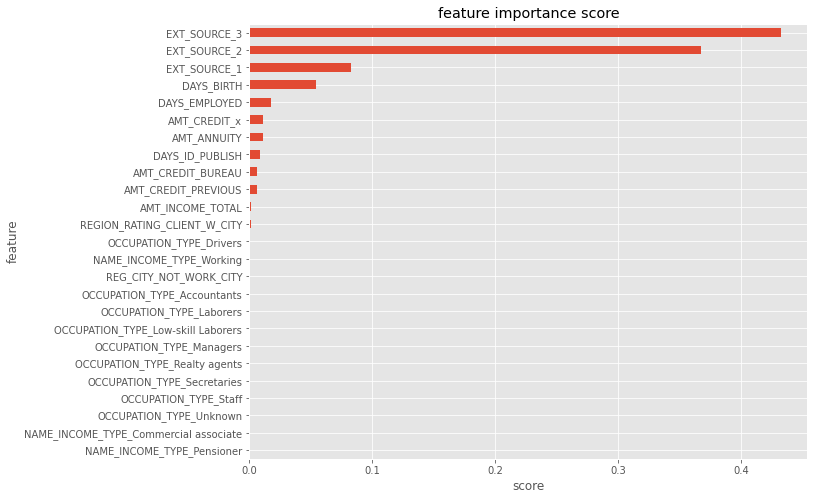

In [284]:
show_feature_importance(model)

In [304]:
feat_importances = model.feature_importances_

In [383]:
cols = pd.Series(feat_importances, index=X_train.columns).nlargest(9).index.to_list()

In [336]:
X_train_selection = X_train[cols].copy()
X_val_selection = X_val[cols].copy()

### Before Feature Selection

In [309]:
model_score(model, "Decision Tree")

Decision Tree:
Train Score:
Recall Score = 0.6882149228670374
ROC_AUC Score = 0.6679652093454037
Validation score:
Recall Score = 0.6761315115286081
ROC_AUC Score = 0.6604244781230264




### After Feature Selection

In [338]:
par = {'min_samples_split': 4, 'min_samples_leaf': 9, 
       'max_depth': 7.0, 'class_weight': 'balanced', 'random_state':42}
model = DecisionTreeClassifier(**par)
model.fit(X_train_selection, y_train)

print('Train Score: ')
y_pred_train = model.predict(X_train_selection)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

print('Validation score:')
ypred = model.predict(X_val_selection)
print(f'Recall Score = {recall_score(y_val, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_val, ypred)}')

Train Score: 
Recall Score = 0.6881624514639522
ROC_AUC Score = 0.6672669910586212
Validation score:
Recall Score = 0.6812553373185312
ROC_AUC Score = 0.6619090899406869


Here we can see that the feature selection slightly increase the recall and ROC_AUC score in the validation data. Moreover, it round down the features that we use to just 9 features which prevent dimensionality reduction and faster computing time.

# Test Data

## Used Features

In [384]:
cols

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_CREDIT_x',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT_BUREAU']

In [385]:
cols[5] = 'AMT_CREDIT'

In [386]:
cols

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT_BUREAU']

In [387]:
cols.remove('AMT_CREDIT_BUREAU')

In [388]:
cols.insert(0,'SK_ID_CURR')

In [389]:
cols

['SK_ID_CURR',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH']

In [390]:
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [391]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [392]:
application_test.isna().any().any()

True

In [393]:
application_test_filledNA = application_test[cols].fillna(0)

In [394]:
application_test_merged_bureau = application_test_filledNA.merge(credit_from_bureau, how = 'left', on = 'SK_ID_CURR')

In [395]:
application_test_merged_bureau.rename(columns = {'AMT_CREDIT_SUM':'AMT_CREDIT_BUREAU'}, inplace = True)

In [397]:
test_columns = application_test_merged_bureau.columns

In [398]:
log_col = ['EXT_SOURCE_1', 'EXT_SOURCE_3',
       'AMT_CREDIT_PREVIOUS', 'AMT_CREDIT_x',
       'AMT_CREDIT_BUREAU', 'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH',
       'AMT_ANNUITY']

In [399]:
test_log_col = []
for col in test_columns:
    if col in log_col:
        test_log_col.append(col)

In [400]:
test_log_col

['EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT_BUREAU']

In [427]:
df_test = application_test_merged_bureau.copy()

In [428]:
df_test.fillna(0, inplace = True)

In [429]:
for col in test_log_col:
    df_test.loc[df_test[col] == 0, col] =  df_test.loc[df_test[col] != 0][col].min()/2

In [430]:
df_test['DAYS_ID_PUBLISH'] = abs(df_test['DAYS_ID_PUBLISH'])

In [431]:
for col in test_log_col:
    df_test[col] = stats.boxcox(df_test[col])[0]

In [432]:
df_test_norm = df_test.copy()
norm_columns = df_test_norm.columns.to_list()
norm_columns.remove('SK_ID_CURR')
for i in norm_columns:
    
    # fit on training data column
    scale = MinMaxScaler().fit(df_test_norm[[i]])
    
    # transform the training data column
    df_test_norm[i] = scale.transform(df_test_norm[[i]])

In [433]:
df_test_norm

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,DAYS_ID_PUBLISH,AMT_CREDIT_BUREAU
0,100001,0.402599,0.923573,0.939947,0.333427,0.039545,0.238037,0.425498,0.161665,0.518341
1,100005,0.686286,0.341118,0.864726,0.399339,0.033953,0.080785,0.391962,0.298768,0.486444
2,100013,0.823603,0.818464,0.000000,0.288794,0.033982,0.280965,0.712434,0.590684,0.000000
3,100028,0.824823,0.596114,0.846276,0.628269,0.040755,0.695297,0.620925,0.694838,0.516491
4,100038,0.000000,0.497880,0.617219,0.680685,0.039905,0.263804,0.520504,0.702729,0.000000
...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.846150,0.758567,0.000000,0.292602,0.032124,0.167035,0.393121,0.575125,0.513862
48740,456222,0.000000,0.800697,0.000000,0.784510,0.042628,0.262401,0.519397,0.515363,0.000000
48741,456223,0.548103,0.740082,0.933084,0.519292,0.037695,0.122699,0.528389,0.279268,0.318433
48742,456224,0.812464,0.521288,0.760758,0.628717,0.038494,0.184049,0.467159,0.256097,0.598215


In [434]:
X_test = df_test_norm.drop('SK_ID_CURR', axis = 1)

In [435]:
par = {'min_samples_split': 4, 'min_samples_leaf': 9, 
       'max_depth': 7.0, 'class_weight': 'balanced', 'random_state':42}
model = DecisionTreeClassifier(**par)
model.fit(X_train_selection, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7.0,
                       min_samples_leaf=9, min_samples_split=4,
                       random_state=42)

In [436]:
y_test_pred = model.predict(X_test)

In [442]:
submission = sample_submission.copy()

In [443]:
submission['TARGET'] = y_test_pred

In [444]:
submission

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [445]:
submission.to_csv("Submission.csv")

# Insight

In [447]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [448]:
def cr(vc):
    return vc[1] / (vc[0] + vc[1]) * 100

In [449]:
cr(application_train['TARGET'].value_counts())

8.072881945686495

In [450]:
application_train[['AMT_CREDIT','AMT_INCOME_TOTAL']].describe()

,AMT_CREDIT,AMT_INCOME_TOTAL
count,3.075110e+05,3.075110e+05
mean,5.990260e+05,1.687979e+05
std,4.024908e+05,2.371231e+05
min,4.500000e+04,2.565000e+04
25%,2.700000e+05,1.125000e+05
50%,5.135310e+05,1.471500e+05
75%,8.086500e+05,2.025000e+05
max,4.050000e+06,1.170000e+08


In [454]:
def group_application_train_TARGET(col):
    ndf = application_train.groupby([col, 'TARGET']).agg({'CustomerID':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'CustomerID':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['CustomerID_x']/ndf['CustomerID_y']) * 100
    return ndf

def plot_box(col):
    df1 = group_application_train_TARGET(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'CustomerID_x', hue = 'TARGET', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'TARGET', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def plot_continuous(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'TARGET', y = col, data = application_train, ax = ax[0])
    sns.histplot(x = col, hue = 'TARGET', data = application_train, ax = ax[1])

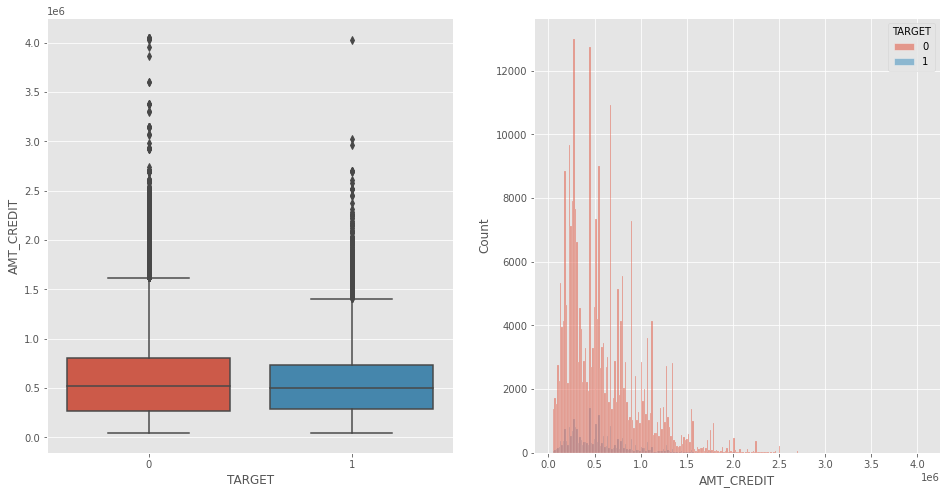

In [455]:
plot_continuous('AMT_CREDIT')

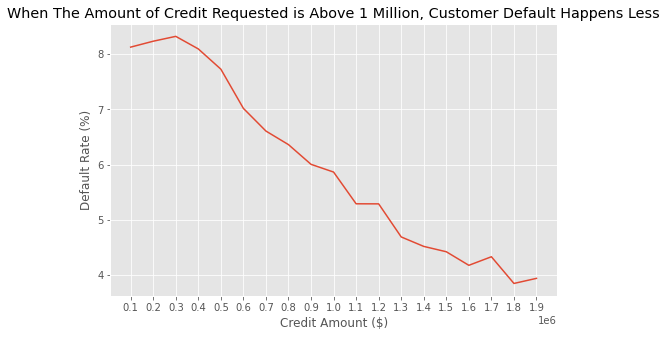

In [495]:
credit = [i for i in range(100000, 2000000, 100000)]
default_rate = []

for i in credit:
    val_counts = application_train[application_train['AMT_CREDIT'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (8,5))
ax = sns.lineplot(x = credit, y = default_rate)
ax.set_xticks(credit);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Credit Amount ($)');
ax.set_title('When The Amount of Credit Requested is Above 1 Million, Customer Default Happens Less');

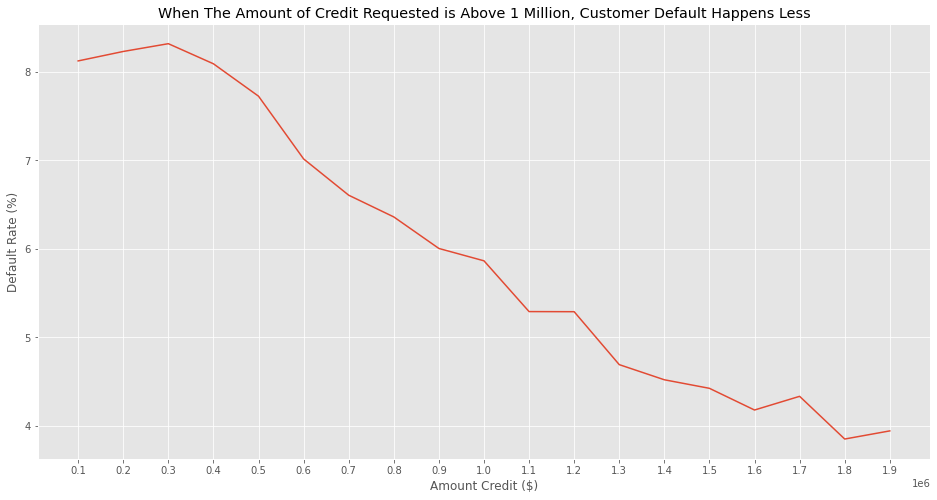

In [472]:
credit = [i for i in range(100000, 2000000, 100000)]
default_rate = []

for i in credit:
    val_counts = application_train[application_train['AMT_CREDIT'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (16,8))
ax = sns.lineplot(x = credit, y = default_rate)
ax.set_xticks(credit);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Amount Credit ($)');
ax.set_title('When The Amount of Credit Requested is Above 1 Million, Customer Default Happens Less');

In [501]:
credit_above_1mil = application_train[application_train['AMT_CREDIT']>1000000]['TARGET'].value_counts()
perc = (credit_above_1mil[1]/(credit_above_1mil[1]+credit_above_1mil[0]))*100
print(f'Default rate when thte amount of credit requested is above 1 million: {perc:.2f}%')

Default rate when thte amount of credit requested is above 1 million: 5.87%


In [473]:
cols

['SK_ID_CURR',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH']

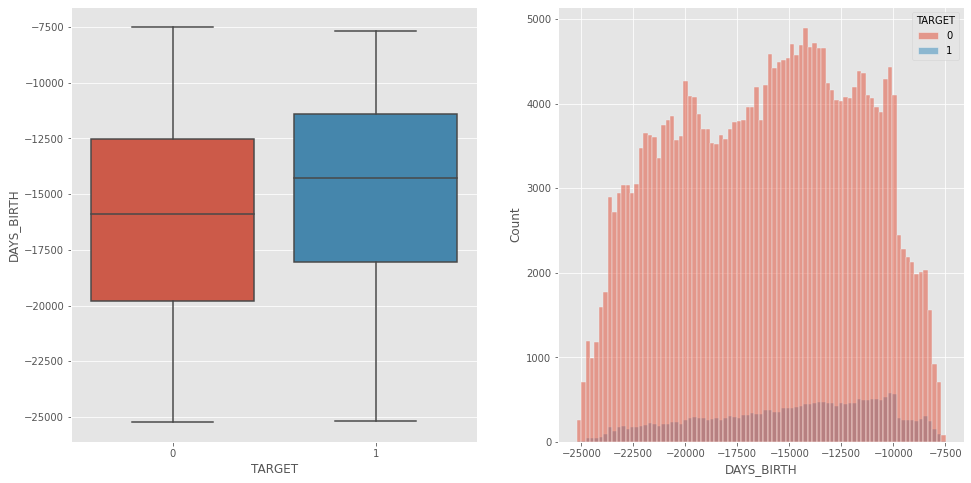

In [474]:
plot_continuous('DAYS_BIRTH')

In [476]:
application_train['Age'] = round(abs(application_train['DAYS_BIRTH'])/365)

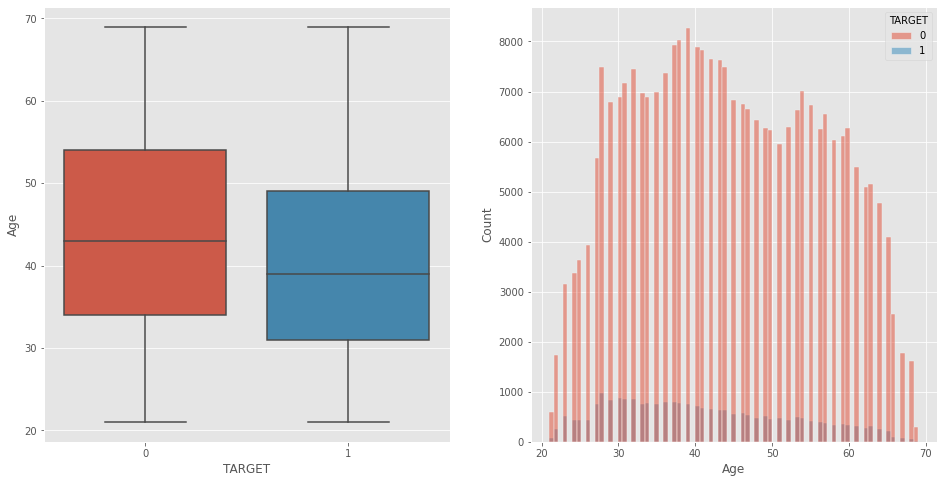

In [477]:
plot_continuous('Age')

In [480]:
application_train['Age'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

In [485]:
application_train[application_train['Age'] >= 60]['TARGET'].value_counts()

0    37087
1     1933
Name: TARGET, dtype: int64

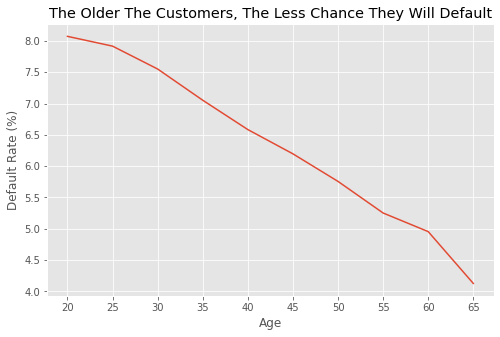

In [496]:
Age = [i for i in range(20, 70, 5)]
default_rate = []

for i in Age:
    val_counts = application_train[application_train['Age'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (8,5))
ax = sns.lineplot(x = Age, y = default_rate)
ax.set_xticks(Age);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Age');
ax.set_title('The Older The Customers, The Less Chance They Will Default');

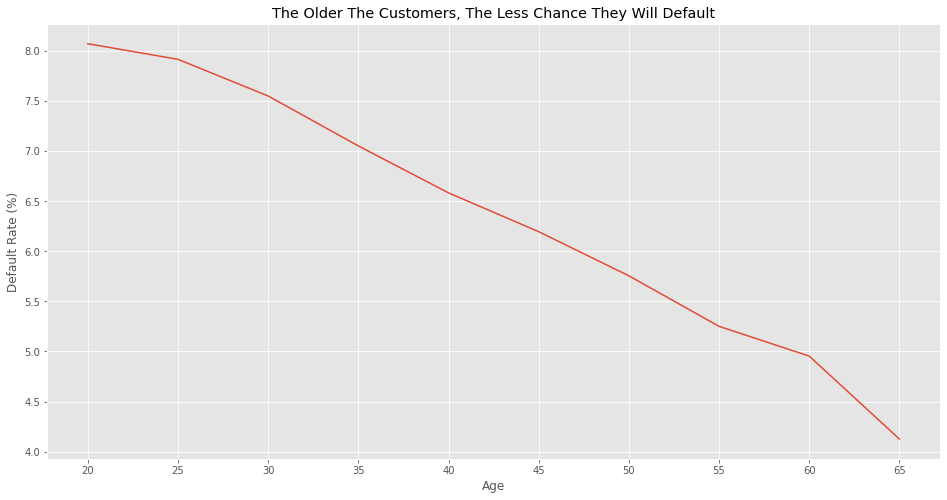

In [491]:
Age = [i for i in range(20, 70, 5)]
default_rate = []

for i in Age:
    val_counts = application_train[application_train['Age'] >= i]['TARGET'].value_counts()
#     print(val_counts)
    default_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (16,8))
ax = sns.lineplot(x = Age, y = default_rate)
ax.set_xticks(Age);
ax.set_ylabel('Default Rate (%)')
ax.set_xlabel('Age');
ax.set_title('The Older The Customers, The Less Chance They Will Default');

In [503]:
above_40 = application_train[application_train['Age'] >= 40]['TARGET'].value_counts()
perc = (above_40[1]/(above_40[1]+above_40[0]))*100
print(f'Default rate when credit applicant is above 40 years old: {perc:.2f}%')

Default rate when credit applicant is above 40 years old: 6.58%


In [493]:
(application_train[application_train['Age'] >= 40]['TARGET'].shape[0] / application_train.shape[0]) * 100

59.989398753215326